**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Grupo 13 - Entregable - Parte 1 - Ejercicio 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto..

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas 
import seaborn as sns
sns.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [3]:
# To update plotly, uncomment and run the following line:
#!pip install plotly --upgrade

In [4]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


**Punto 1**

In [5]:
#Análisis de valores extremos sobre la distribución del precio
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
melb_df.Price.describe().round()   #La variable precio no tiene datos faltantes, tiene un mínimo de $85.000 y un máximo de $9.000.000.

count      13580.0
mean     1075684.0
std       639311.0
min        85000.0
25%       650000.0
50%       903000.0
75%      1330000.0
max      9000000.0
Name: Price, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


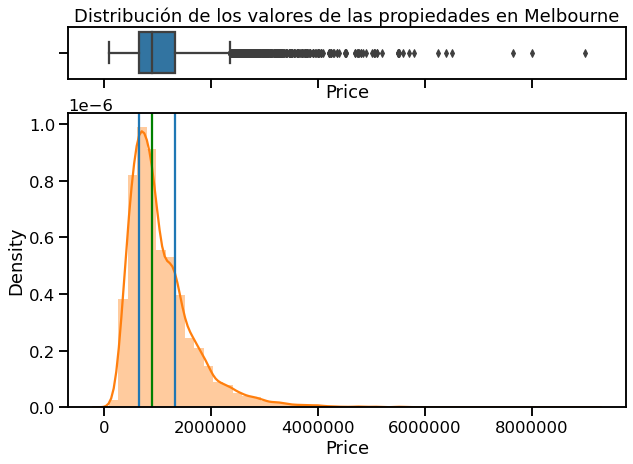

In [6]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(melb_df.Price, ax=ax_box)
sns.distplot(melb_df.Price, ax=ax_hist, kde=False, hist=False)
sns.distplot(melb_df.Price, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(melb_df.Price.quantile(0.25))
plt.axvline(melb_df.Price.quantile(0.50),color='g')
plt.axvline(melb_df.Price.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de las propiedades en Melbourne")
plt.show()


Se advierte que la distribución de los valores de las propiedades en Melbourne está sesgada a la izquierda (o asimétrica derecha), con un valor mínimo de 85.000 y un máximo de 9.000.000.
Si bien no contamos con un conocimiento previo sobre la temática, podríamos concluir a partir del boxplot que existen ciertos valores outliers para el valor de las propiedades sobre todo entre aquellos valores más altos. Estos podrían ser eliminados para no afectar la capacidad de predecir el valor de venta de las propiedades a futuro. Dado el escaso conocimiento que tenemos sobre la temática, se optará por emplear el criterio del rango intercuartílico para eliminación de datos atípicos.

In [7]:
#Se podría definir una regla objetiva para eliminar datos outliers como: 1.5 veces el RI por encima o por debajo de los cuartiles 1 y 3. 
q25=melb_df.Price.quantile(.25)
q75=melb_df.Price.quantile(.75)
RI=q75-q25
min=q25-1.5*RI
max=q75+1.5*RI
print("Nuevo mínimo=", min)   #como el mínimo es negativo, tomaría cero como el mínimo. Es decir, solo restringiríamos la cola derecha de la distribución
print("Nuevo máximo=", max)

Nuevo mínimo= -370000.0
Nuevo máximo= 2350000.0


In [8]:
#Eliminación de los valores outliers de la variable Precio
melb_df2=melb_df[melb_df.Price<max]

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


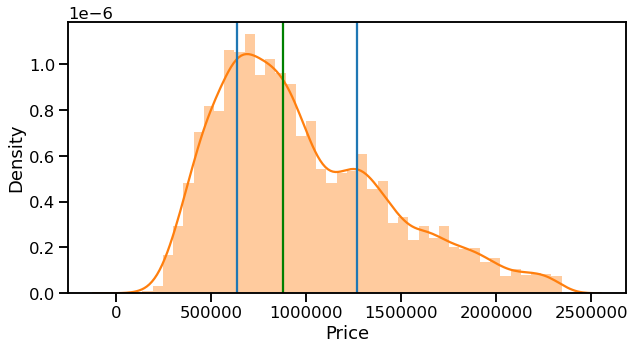

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(melb_df2.Price, kde=False, hist=False)
sns.distplot(melb_df2.Price, kde=True, hist=True,norm_hist=False)

plt.axvline(melb_df2.Price.quantile(0.25))
plt.axvline(melb_df2.Price.quantile(0.50),color='g')
plt.axvline(melb_df2.Price.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de las propiedades en Melbourne, sin datos outliers")
plt.show()

*melb_df2* es el dataset que usaremos en adelante. El mismo cuenta con la variable Precio filtrada y sin datos outliers.

**Punto 2**
1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [10]:
melb_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12956 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12956 non-null  object 
 1   Address        12956 non-null  object 
 2   Rooms          12956 non-null  int64  
 3   Type           12956 non-null  object 
 4   Price          12956 non-null  float64
 5   Method         12956 non-null  object 
 6   SellerG        12956 non-null  object 
 7   Date           12956 non-null  object 
 8   Distance       12956 non-null  float64
 9   Postcode       12956 non-null  float64
 10  Bedroom2       12956 non-null  float64
 11  Bathroom       12956 non-null  float64
 12  Car            12897 non-null  float64
 13  Landsize       12956 non-null  float64
 14  BuildingArea   6766 non-null   float64
 15  YearBuilt      7798 non-null   float64
 16  CouncilArea    11670 non-null  object 
 17  Lattitude      12956 non-null  float64
 18  Longti

Podemos agrupar a las variables por tipo para hacer algunos análisis

*Cuantitativa*: Rooms Price Distance Bedroom2 Bathroom Car Landsize BuildingArea   Propertycount

*Categórica*: Suburb Address Type Method SellerG  CouncilArea Regionname

*Tiempo*: Date  YearBuilt 

*Códigos y localización*: Postcode Lattitude  Longtitude  

### **Variables cuantitativas**

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda

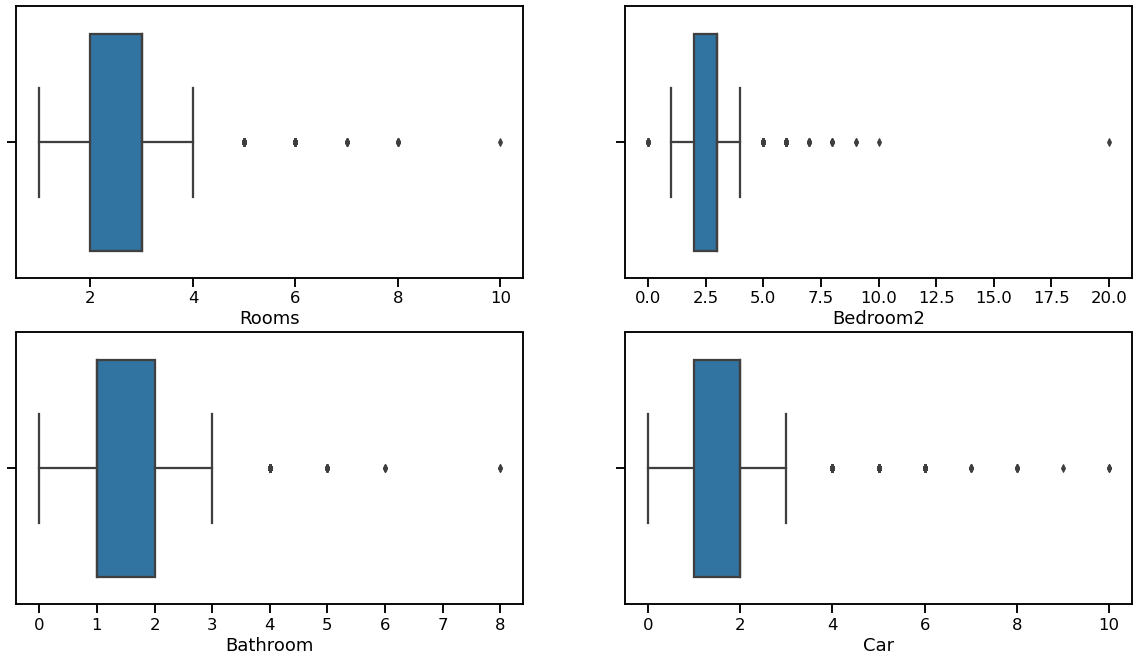

In [11]:
 #Análisis de las variables cuantitativas  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 11))
sns.boxplot(melb_df2.Rooms, ax=axes[0,0])
sns.boxplot(melb_df2.Bedroom2, ax=axes[0,1])
sns.boxplot(melb_df2.Bathroom, ax=axes[1,0])
sns.boxplot(melb_df2.Car, ax=axes[1,1])
plt.show()


In [12]:
melb_df2.Landsize.describe()    #no tiene datos NaN pero tiene una variabilidad enorme y muchos "0", lo cual no tiene sentido

count    12956.000000
mean       517.115313
std       1498.205505
min          0.000000
25%        168.000000
50%        416.000000
75%        645.000000
max      76000.000000
Name: Landsize, dtype: float64

In [13]:
melb_df2.BuildingArea.describe()  #tiene muchos valores perdidos y además muchos "0", los cuales tampoco tienen sentido.

count     6766.000000
mean       144.997402
std        552.864779
min          0.000000
25%         91.000000
50%        122.000000
75%        165.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [14]:
print("Porcentaje de datos perdidos=", melb_df2.BuildingArea.isna().sum()/len(melb_df2)*100,"%")

Porcentaje de datos perdidos= 47.77709169496758 %


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

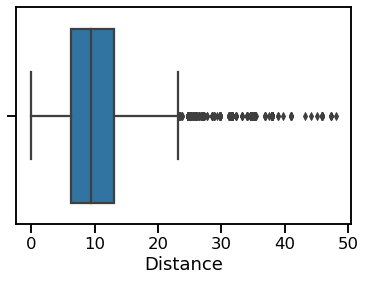

In [15]:
sns.boxplot(melb_df2.Distance)   #Esta variable es relevante para la explicación del precio

<AxesSubplot:xlabel='Propertycount', ylabel='Count'>

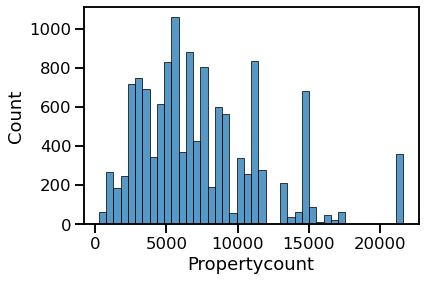

In [17]:
sns.histplot(melb_df2.Propertycount)  #representa la cantidad de propiedades que existen en el mismo Suburb, es relevante por que da una idea de la oferta disponible y de la densidad de la zona 


### **Variables de localización**

<AxesSubplot:xlabel='Lattitude', ylabel='Count'>

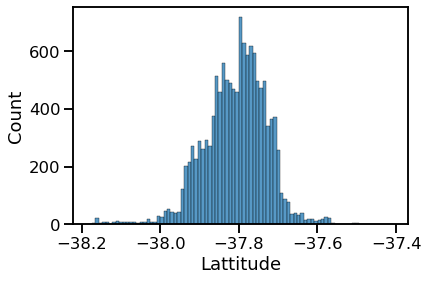

In [17]:
sns.histplot(melb_df2.Lattitude) #No posee valores nulos y su distribución es normal, con pocos valores extremos

<AxesSubplot:xlabel='Longtitude', ylabel='Count'>

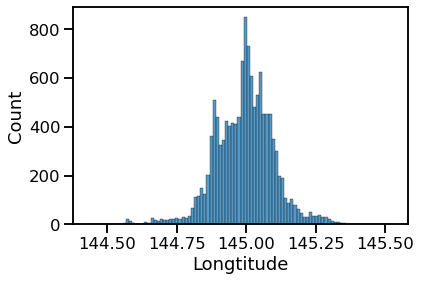

In [19]:
sns.histplot(melb_df2.Longtitude) #No posee valores nulos y su distribución es normal, con pocos valores extremos

### Correlación entre variables numéricas

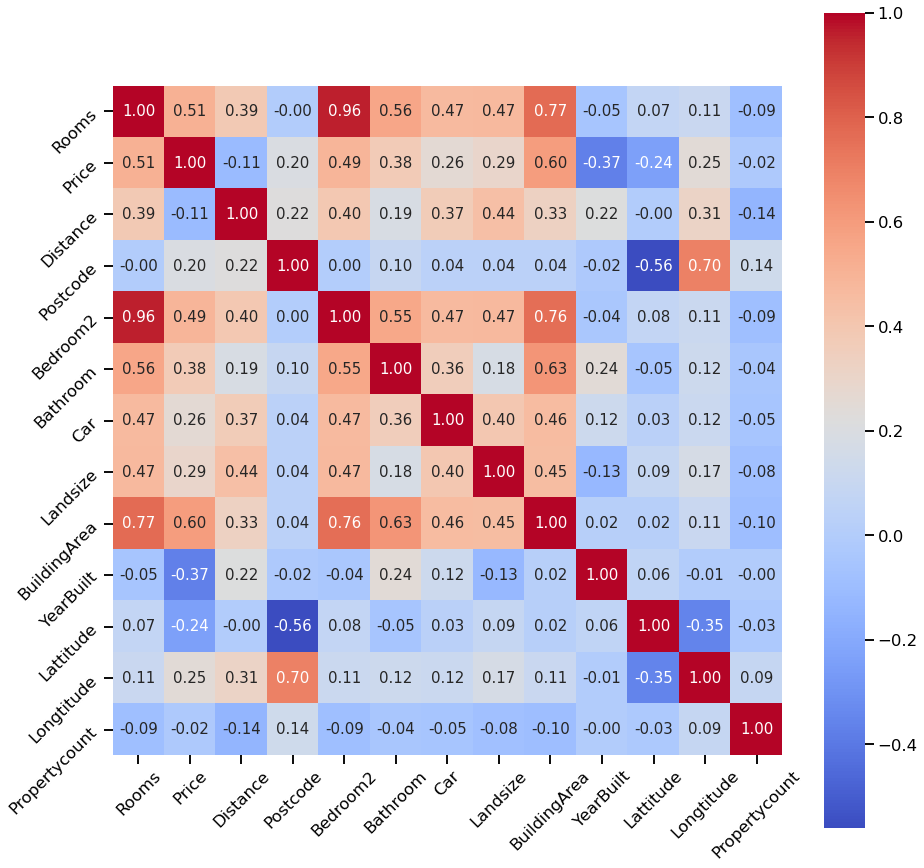

In [18]:
corr = melb_df2.corr("spearman")  #Debido a que las variables no poseen distribución normal se utilizó el metodo de spearman
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

A partir del análisis de correlación entre las variables numéricas, podemos observar una correlación alta (r=0.96) entre las variables Rooms y Bedroom2. Esto nos indica que ambas variables proveen información similar, por lo que deberíamos quedarnos solo con una de ellas. Debido a que la variable Bedroom2 posee valores 0, lo cual es poco confiable ya que es inusual que una casa no posea habitaciones y, sumado a que fue incluida a partir de otro dataset, decidimos desecharla y quedarnos con la variable Rooms. Si bien las variables BuildingArea y Rooms también se encuentran altamente correlacionadas (r=0.77), BuildingArea posee una gran cantidad de datos faltantes (casi la mitad) lo cual podría estar incidiendo sobre el valor de la correlación.

### **Variables categóricas**

<AxesSubplot:xlabel='Type', ylabel='count'>

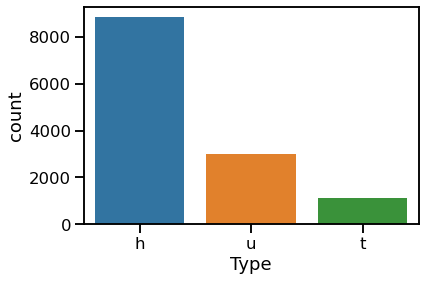

In [19]:
sns.countplot(data=melb_df2, x="Type")

*Nota*: Las categorías de la variable Type son: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. En este caso, tendríamos solo: a) house,cottage,villa, semi,terrace; b) unit, duplex, c) townhouse.

<AxesSubplot:xlabel='Method', ylabel='count'>

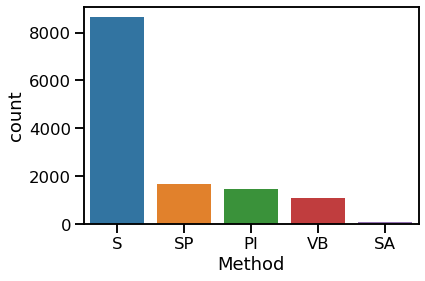

In [20]:
sns.countplot(data=melb_df2, x="Method")   

*Nota*: Las categorías de la variable Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

En este caso tendríamos solo: a) S - property sold (propiedad vendida); b) SP - property sold prior (propiedad vendida antes de, podría ser antes de una subasta); c) PI - property passed in (esto es cuando la máxima oferta en la subasta no superó el precio de reserva del vendedor, y el vendedor podría optar por no venderselo al mayor postor en la subasta, sino que ambos podrían negociar fuera de ella); d) VB - vendor bid (Oferta de vendedor es una oferta realizada por el subastador en nombre del vendedor. No es una oferta real para comprar la propiedad sino más bien, es una declaración pública de que el vendedor no está contento con el monto de la última oferta y se utiliza para que la oferta siga avanzando); e) SA - sold after auction (vendida por medio de subasta).

Teniendo en cuanta esta clasificación, uno podría generar una variable que represente si el valor de la propiedad estaría acorde, sub o sobre valuada en función del precio de subasta. El supuesto base es que el precio de subasta sería el "precio justo". 
Categorias: "En valor": S, SA
            "Subvaluada": PI, VB
            "Sobrevaluada":SP

In [21]:
auction_price_groups = {
    'S': 'On price',
    'SA': 'On price',
    'PI': 'Under',
    'VB': 'Under',
    'SP': 'Above'
}
auction_price = melb_df2.Method.replace(auction_price_groups)

<AxesSubplot:xlabel='Method', ylabel='count'>

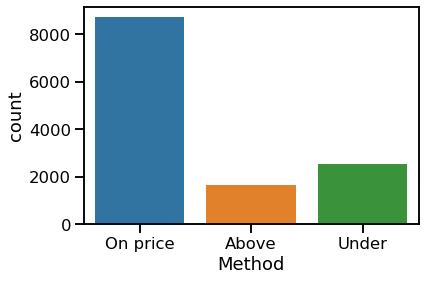

In [22]:
sns.countplot(data=melb_df2, x=auction_price)

In [22]:
melb_df2.SellerG.describe()   #Son muchas categorías posibles, a primera vista no podremos juzgar nada respecto de ella. Pero eventualmente, ciertos vendedores podrían asociarse con ventas a mayor precio.

count      12956
unique       265
top       Nelson
freq        1548
Name: SellerG, dtype: object

Sobre la localización de la casa para explicar el precio, tenemos distintos niveles de precisión para explicarlo. 

1- La dirección exacta (no nos dice nada puntual, ya que no tenemos conocimiento del dominio)

2- El suburbio, son muchas categorías aún, pero se encuentra un poco más agrupada que 1. **Puede estar vinculada a POSTCODE, que usaremos para los merge de datos con otras bases**

3- CouncilArea, son más de 30 categorías que agrupan a varios suburbs y representa el Consejo Gubernamental de la zona (Municipio).

4- Regionname, es la variable que agrupa en mayor medida a las casas según localización. De momento, será esta la variable que tomemos de referencia para analizar. 

5- Latitud y longitud, puede emplearse directamente para graficar ubicaciones o para medir distancias con respecto a distintos puntos relevantes. Puede ser muy interesante para explicar el precio de venta de una propiedad.

In [24]:
melb_df2.Suburb.describe()   #Hay 314 suburb distintos, que sin info de dominio no me dicen mucho. Pero en algún modelo relacional puede explicar.
#No podríamos definir ninguna manera de agruparla, pero tampoco la eliminaríamos

count         12956
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

In [25]:
melb_df2.CouncilArea.describe() 

count        11670
unique          33
top       Moreland
freq          1160
Name: CouncilArea, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

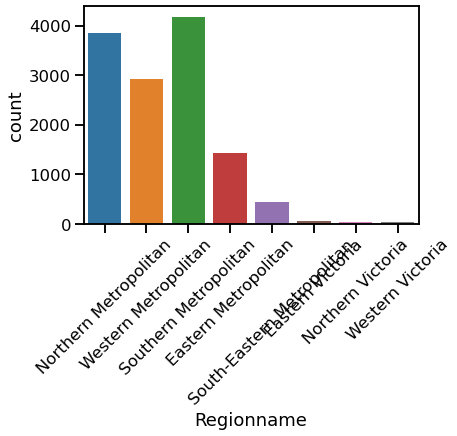

In [23]:
sns.countplot(data=melb_df2, x="Regionname")
plt.xticks(rotation=45)

In [24]:
melb_df2.Regionname.value_counts()  

Southern Metropolitan         4177
Northern Metropolitan         3846
Western Metropolitan          2925
Eastern Metropolitan          1435
South-Eastern Metropolitan     447
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [25]:
new_groups = {
    'Eastern Victoria': 'Victoria',
    'Northern Victoria': 'Victoria',
    'Western Victoria': 'Victoria',
    'Southern Metropolitan': 'Southern Metropolitan',
    'Northern Metropolitan': 'Northern Metropolitan',
    'Western Metropolitan': 'Western Metropolitan',
    'Eastern Metropolitan': 'South-Eastern Metropolitan',
    'South-Eastern Metropolitan': 'South-Eastern Metropolitan',
}
grouped_region = melb_df2.Regionname.replace(new_groups)

Las categorías de la variable RegionName eran 8. No obstante, podemos reagrupar todo lo que no es área metropolitana en una sola categoría a la cual denominamos "Victoria". Adicionalmente, agrupamos Eastern Metropolitan con South-Eastern Metropolitan en una sola categoría. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'South-Eastern Metropolitan'),
  Text(4, 0, 'Victoria')])

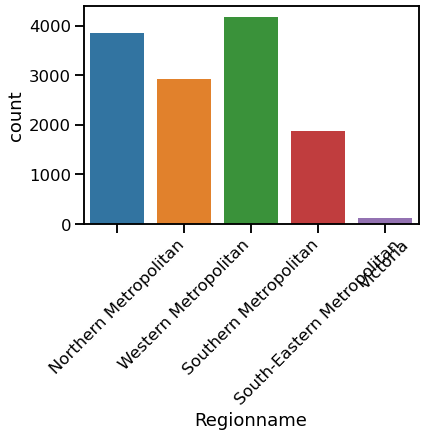

In [26]:
sns.countplot(data=melb_df2, x=grouped_region)
plt.xticks(rotation=45)

### **Sobre las variables de tiempo:** 
- En cuanto a la variable Date, la transformamos en serie temporal y adicionalmente extraemos mes y año, variables que podrían ser más relevantes para realizar ciertos análisis.
- En cuanto a la variable YearBuilt, se podría crear una variable que represente la antiguedad de la vivienda y categorizarla en grupos de acuerdo a la cantidad de años de antiguedad que tenga. 
*Podríamos crear varíables categóricas para la antiguedad que indiquen: Menos de 5 años de antiguedad, entre 5 y 20 años de antiguedad, entre 20 y 35 años de antiguedad, entre 35 y 50 años de antiguedad, entre 50 y 65 años de antiguedad, y más de 65 años de antiguedad.

In [27]:
#Transformar la variable Date en una variable temporal  
melb_df2['date'] = pandas.to_datetime(melb_df2.Date, dayfirst=True)

<ipython-input-27-1e168436c3c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df2['date'] = pandas.to_datetime(melb_df2.Date, dayfirst=True)


In [31]:
#Dado que la precisión por día no será útil, extraer por mes y año 
melb_df2['date_month'] = pandas.to_datetime(melb_df2.date.dt.strftime('%Y-%m'))
melb_df2['date_year'] = pandas.to_datetime(melb_df2.date.dt.strftime('%Y'))

<ipython-input-31-99d6aa71755a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df2['date_month'] = pandas.to_datetime(melb_df2.date.dt.strftime('%Y-%m'))
<ipython-input-31-99d6aa71755a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df2['date_year'] = pandas.to_datetime(melb_df2.date.dt.strftime('%Y'))


In [32]:
melb_df2_serie_mes=melb_df2.resample('m',on='date').mean()

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


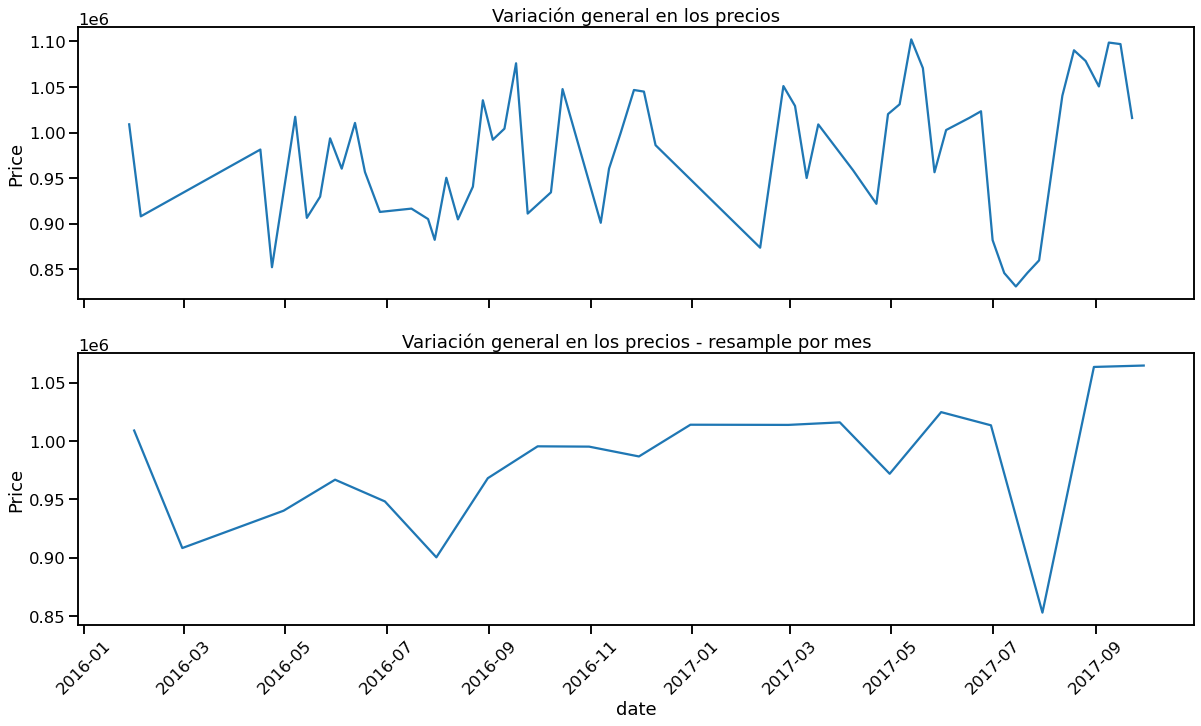

In [53]:
fig, axes = plt.subplots(nrows=2, figsize=(20, 11), sharex=True)

sns.lineplot(melb_df2.date,y=melb_df2.Price, ax=axes[0],ci=None)
axes[0].set_title("Variación general en los precios")
sns.lineplot(melb_df2_serie_mes.index,melb_df2_serie_mes.Price, ax=axes[1])
axes[1].set_title("Variación general en los precios - resample por mes")

plt.xticks(rotation=45)

plt.show()

In [35]:
melb_df2.YearBuilt.describe()

count    7798.000000
mean     1965.767120
std        36.555041
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [36]:
#Pero ojo! Tiene muchos datos faltantes.
print("Porcentaje de datos perdidos=", melb_df2.YearBuilt.isna().sum()/len(melb_df2)*100,"%")

Porcentaje de datos perdidos= 39.81167026860142 %


<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

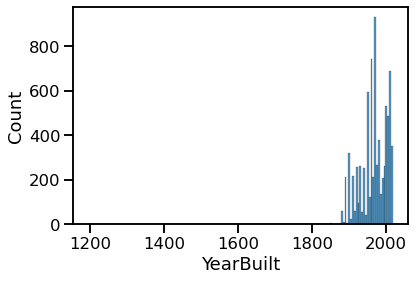

In [37]:
sns.histplot(data=melb_df2,x="YearBuilt")

In [38]:
print("Rango de años de construcción: ",melb_df2.YearBuilt.max()-melb_df2.YearBuilt.min())  
#En el mínimo tiene que haber algunos valores outliers

Rango de años de construcción:  822.0


Nuevo mínimo:  1830.0


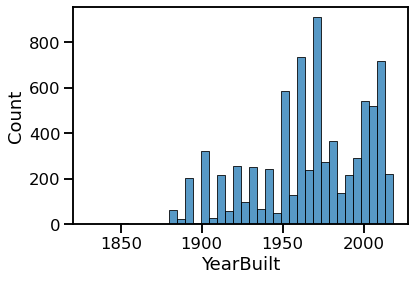

In [39]:
sns.histplot(data=melb_df2[melb_df2.YearBuilt>1800],x="YearBuilt")
print("Nuevo mínimo: ", melb_df2[melb_df2.YearBuilt>1800].YearBuilt.min())

In [ ]:
melb_df2=melb_df2[melb_df2.YearBuilt!=1196]  #eliminamos de la base de datos el outlier de YearBuilt

**Para concluir**

In [41]:
melb_df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'date', 'date_month',
       'date_year'],
      dtype='object')

En resumen, abajo se detallan las variables de dejar fuera del análisis y su justificación:

`Suburb`, `Address`, `CouncilArea` serán dejadas de lado dado que sin conocimiento del dominio no nos sirven para vincularlas al precio.
En primer momento, optaremos por una categorización más general para la localización (dada por Regionname), el código postal (POSTCODE) para cuando necesitemos vincular a datos de otras fuentes de datos y Latitud-Longitud cuando querramos una referencia exacta de la localización. Adicionalmente, se considera como variable relevante para predecir el precio de venta a la distancia de la casa hasta el CBD (Distance), la cual representa de una manera sintética la información de las variables que fueron eliminadas.

En cuanto a otras variables numéricas, Bethroom2 será dejada de lado por tener una alta correlación con la variable Room. Se tomará como referencia a la variable Room ya que está más completa y confiable. 

En cuanto a la variable SellerG, sin conocimiento extra del contexto no nos aporta información muy relevante al momento. No obstante, podría encontrarse vínculos entre el vendedor y los precios, con lo cual la misma será mantenida dentro de la base de datos.

In [29]:
relevant_columns=['Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'SellerG']

**Punto 3**

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [30]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


In [32]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [33]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': ['mean', 'count'],
        'monthly_price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price count': 'airbnb_weekly_price_count',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price count': 'airbnb_monthly_price_count'}
)

In [34]:
#ver bien a cuáles le pone NaN, si siempre que tenga una observación sin dato pone NaN a todo el promedio
print("NaN de price:",airbnb_price_by_zipcode.airbnb_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")
print("NaN de weekly price:",airbnb_price_by_zipcode.airbnb_weekly_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")
print("NaN de monthly price:",airbnb_price_by_zipcode.airbnb_monthly_price_mean.isna().sum()/len(airbnb_price_by_zipcode)*100,"%.")

NaN de price: 0.0 %.
NaN de weekly price: 25.506072874493928 %.
NaN de monthly price: 31.983805668016196 %.


In [48]:
intersection = np.intersect1d(
    airbnb_price_by_zipcode.zipcode.values, melb_df2.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_price_by_zipcode.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df2.Postcode.unique()))
print("Common zipcodes", len(intersection))  

Airbnb unique zipcodes 247
Sales unique zipcodes 198
Common zipcodes 191


In [35]:
merged_df = melb_df2.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)

In [36]:
merged_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12956 entries, 0 to 12955
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Suburb                      12956 non-null  object        
 1   Address                     12956 non-null  object        
 2   Rooms                       12956 non-null  int64         
 3   Type                        12956 non-null  object        
 4   Price                       12956 non-null  float64       
 5   Method                      12956 non-null  object        
 6   SellerG                     12956 non-null  object        
 7   Date                        12956 non-null  object        
 8   Distance                    12956 non-null  float64       
 9   Postcode                    12956 non-null  float64       
 10  Bedroom2                    12956 non-null  float64       
 11  Bathroom                    12956 non-null  float64   

In [37]:
#quedarse con aquellos zipcodes que tengan al menos 10 datos para el precio
merged_df2=merged_df[merged_df.airbnb_record_count>10]
print("Nan en precio promedio: ", merged_df2.airbnb_price_mean.isna().sum())
print("Nan en precio promedio semanal: ", merged_df2.airbnb_weekly_price_mean.isna().sum())
print("Nan en precio promedio mensual: ", merged_df2.airbnb_monthly_price_mean.isna().sum())

Nan en precio promedio:  0
Nan en precio promedio semanal:  528
Nan en precio promedio mensual:  864


Otras maneras posibles de hacer el merge podrían ser:
- Explorar la variable suburb y ver cuántas coincidencias hay/no hay, sería una posibilidad. 
- La otra posibilidad sería pensar coincidencias por latitud-longitud, armar grupos de zonas en base a coordenadas. Armar los gurpos de igual manera en los dos datasets y unirlos en base a esa variable key.
- Otra alternativa sería asociarla con el precio promedio de las casas que se encuentran más cerca. Diseñar algún algoritmo que mida distancias hacia a algún punto según lat y longitud, y luego definir un delta máximo para la distancia permitida.

In [38]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12358 entries, 0 to 12955
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Suburb                      12358 non-null  object        
 1   Address                     12358 non-null  object        
 2   Rooms                       12358 non-null  int64         
 3   Type                        12358 non-null  object        
 4   Price                       12358 non-null  float64       
 5   Method                      12358 non-null  object        
 6   SellerG                     12358 non-null  object        
 7   Date                        12358 non-null  object        
 8   Distance                    12358 non-null  float64       
 9   Postcode                    12358 non-null  float64       
 10  Bedroom2                    12358 non-null  float64       
 11  Bathroom                    12358 non-null  float64   